<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.631527,28.295929,-0.063816,84.863640,84.926989,-0.063349
1,0.0,1.0,59.588560,87.402114,-0.003742,156.986932,156.992554,-0.005623
2,0.0,2.0,26.955004,34.783832,-0.056420,71.682416,71.737408,-0.054992
3,0.0,3.0,34.031151,90.918403,-0.000746,134.948808,134.950053,-0.001245
4,0.0,4.0,92.277106,24.470598,-0.026105,126.721599,126.749770,-0.028171
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.754465,46.211687,-0.042739,101.923414,101.966664,-0.043251
119996,999.0,116.0,72.727615,81.131456,-0.004147,163.854923,163.856614,-0.001690
119997,999.0,117.0,74.374506,93.940045,0.010146,178.324697,178.311017,0.013680
119998,999.0,118.0,99.963138,59.040392,-0.014684,168.988846,169.002886,-0.014040


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.631527,28.295929,-0.063816,84.863640,84.926989,-0.063349
1,0.0,1.0,59.588560,87.402114,-0.003742,156.986932,156.992554,-0.005623
2,0.0,2.0,26.955004,34.783832,-0.056420,71.682416,71.737408,-0.054992
3,0.0,3.0,34.031151,90.918403,-0.000746,134.948808,134.950053,-0.001245
4,0.0,4.0,92.277106,24.470598,-0.026105,126.721599,126.749770,-0.028171
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.754465,46.211687,-0.042739,101.923414,101.966664,-0.043251
119996,999.0,116.0,72.727615,81.131456,-0.004147,163.854923,163.856614,-0.001690
119997,999.0,117.0,74.374506,93.940045,0.010146,178.324697,178.311017,0.013680
119998,999.0,118.0,99.963138,59.040392,-0.014684,168.988846,169.002886,-0.014040


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.631527  28.295929 -0.063816   84.863640   84.926989 -0.063349
      1.0    59.588560  87.402114 -0.003742  156.986932  156.992554 -0.005623
      2.0    26.955004  34.783832 -0.056420   71.682416   71.737408 -0.054992
      3.0    34.031151  90.918403 -0.000746  134.948808  134.950053 -0.001245
      4.0    92.277106  24.470598 -0.026105  126.721599  126.749770 -0.028171
...                ...        ...       ...         ...         ...       ...
999.0 115.0  45.754465  46.211687 -0.042739  101.923414  101.966664 -0.043251
      116.0  72.727615  81.131456 -0.004147  163.854923  163.856614 -0.001690
      117.0  74.374506  93.940045  0.010146  178.324697  178.311017  0.013680
      118.0  99.963138  59.040392 -0.014684  168.988846  169.002886 -0.014040
      119.0  78.451126  85.517361 -0.001310  173.967178  173.965654  0.001524

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.631527  28.295929 -0.063816   84.863640   84.926989 -0.063349
      1.0    59.588560  87.402114 -0.003742  156.986932  156.992554 -0.005623
      2.0    26.955004  34.783832 -0.056420   71.682416   71.737408 -0.054992
      3.0    34.031151  90.918403 -0.000746  134.948808  134.950053 -0.001245
      4.0    92.277106  24.470598 -0.026105  126.721599  126.749770 -0.028171
...                ...        ...       ...         ...         ...       ...
999.0 115.0  45.754465  46.211687 -0.042739  101.923414  101.966664 -0.043251
      116.0  72.727615  81.131456 -0.004147  163.854923  163.856614 -0.001690
      117.0  74.374506  93.940045  0.010146  178.324697  178.311017  0.013680
      118.0  99.963138  59.040392 -0.014684  168.988846  169.002886 -0.014040
      119.0  78.451126  85.517361 -0.001310  173.967178  173.965654  0.001524

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.631527,28.295929,-0.063816,84.863640,84.926989,-0.063349
1,0.0,1.0,59.588560,87.402114,-0.003742,156.986932,156.992554,-0.005623
2,0.0,2.0,26.955004,34.783832,-0.056420,71.682416,71.737408,-0.054992
3,0.0,3.0,34.031151,90.918403,-0.000746,134.948808,134.950053,-0.001245
4,0.0,4.0,92.277106,24.470598,-0.026105,126.721599,126.749770,-0.028171
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.754465,46.211687,-0.042739,101.923414,101.966664,-0.043251
119996,999.0,116.0,72.727615,81.131456,-0.004147,163.854923,163.856614,-0.001690
119997,999.0,117.0,74.374506,93.940045,0.010146,178.324697,178.311017,0.013680
119998,999.0,118.0,99.963138,59.040392,-0.014684,168.988846,169.002886,-0.014040


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.631527  28.295929 -0.063816   84.863640   84.926989 -0.063349
      1.0    59.588560  87.402114 -0.003742  156.986932  156.992554 -0.005623
      2.0    26.955004  34.783832 -0.056420   71.682416   71.737408 -0.054992
      3.0    34.031151  90.918403 -0.000746  134.948808  134.950053 -0.001245
      4.0    92.277106  24.470598 -0.026105  126.721599  126.749770 -0.028171
...                ...        ...       ...         ...         ...       ...
999.0 115.0  45.754465  46.211687 -0.042739  101.923414  101.966664 -0.043251
      116.0  72.727615  81.131456 -0.004147  163.854923  163.856614 -0.001690
      117.0  74.374506  93.940045  0.010146  178.324697  178.311017  0.013680
      118.0  99.963138  59.040392 -0.014684  168.988846  169.002886 -0.014040
      119.0  78.451126  85.517361 -0.001310  173.967178  173.965654  0.001524

[120000 rows x 6 columns]

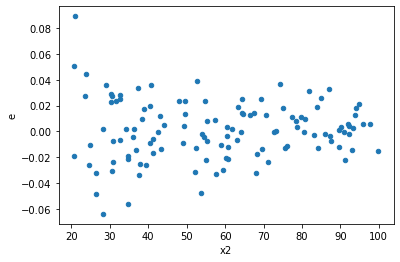

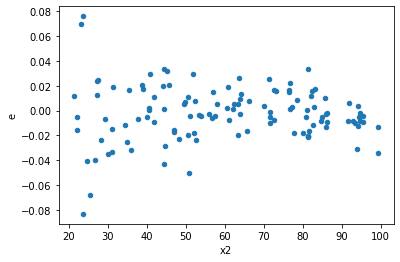

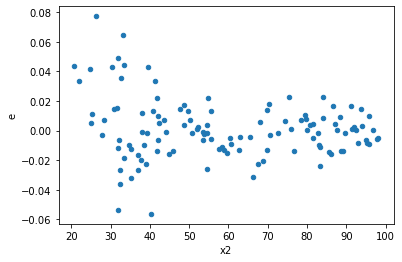

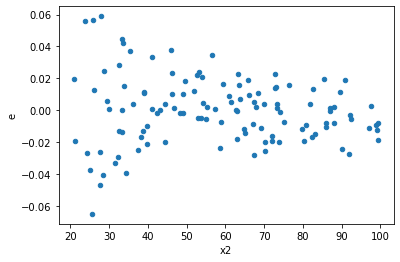

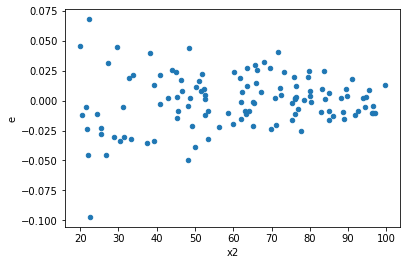

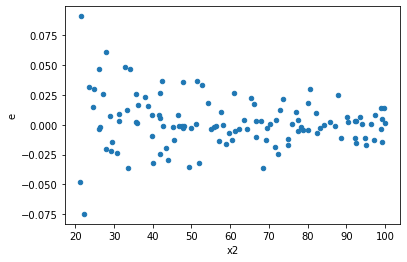

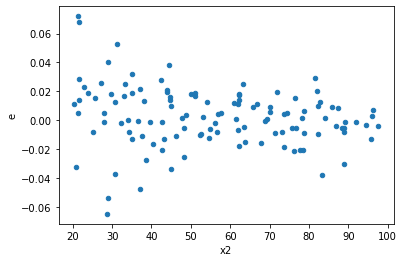

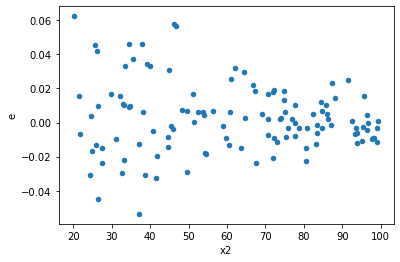

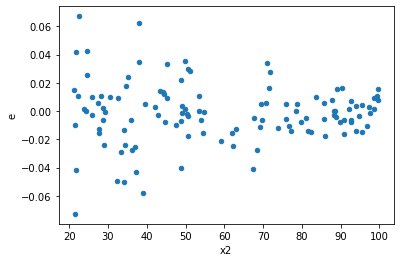

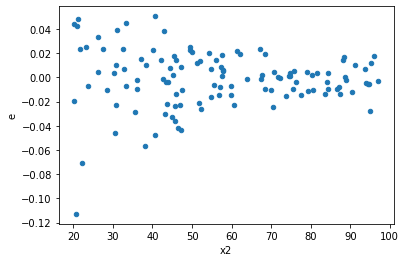

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
942.0,46.0,46.0,0.012099140314127904,0.014534480173564035,0.0002630247894375631,0.00031596696029487036,1.2012820577502057,0.5365074854952527,0.7317462572523736,0.26825374274762637,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.03865754892704865,0.012398458680380385,0.0008403814984141012,0.00026953171044305187,0.3207254216706221,0.00018436380195066958,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.03313557404503767,0.009619048787628759,0.0007203385661964711,0.00020910975625279912,0.2902937119651106,5.127498230811266e-05,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.02968012062859677,0.007044253773380809,0.0006452200136651472,0.00015313595159523497,0.23733912208542968,3.097603748307592e-06,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.037152959665098934,0.006943528442481935,0.0008076730361978029,0.00015094627048873772,0.18689031789315583,7.829636781786223e-08,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.038097340338336984,0.009299722822696435,0.0008282030508334127,0.0002021678874499225,0.24410425347562162,4.660926286243087e-06,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.02526514374106149,0.009898259254663557,0.0005492422552404671,0.00021517954901442514,0.39177529944453393,0.0018982736168301605,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.03545924532864113,0.008663188380267858,0.0007708531593182854,0.00018833018217973604,0.24431395253836466,4.719079346950115e-06,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.02988406803708756,0.006200870678681521,0.0006496536529801643,0.00013480153649307654,0.20749754253624184,4.090157418294759e-07,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.037757345052995085,0.011309285320645943,0.000820811848978154,0.0002458540287096944,0.2995254381570676,7.726076943967546e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    901
Reject001=1 : Homoscedasticity       99
Name: Result_test, dtype: int64